In [1]:
import sys
sys.path.append('/home/sdybing/neic-mlaapde')

from mlaapde.access import MLAAPDE_Access
from mlaapde import UTC
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

mlpa = MLAAPDE_Access(data_dir='/data/hank/mlaapde_subset/data', random_seed=616) # 3 months
# mlpa = MLAAPDE_Access(data_dir='/data/hank/mlaapde_v1b/data', random_seed=616) # mid-2013 to 2020

2022-07-01 10:47:06 - mlaapde.access.MLAAPDE_Access - INFO - MLAAPDE_Access.__init__() starting
2022-07-01 10:47:07 - mlaapde.access.MLAAPDE_Access - INFO - MLAAPDE_Access.__init__() complete


In [2]:
!cat mlaapde/mlaapde.ini # checking the config file to make sure it points at the data

[DEFAULT]
data_dir = /data/hank/mlaapde_subset/data
logs_dir = /home/sdybing/neic-mlaapde/mlaapde/logs
iris_n_attempt = 6
iris_sleep_sec = 2
iris_timeout_sec = 12
pre_event_sec = 60
post_event_sec = 60
resample_hz = 40
valid_phases = [P,Pn,Pg];[S,Sn,Sg]



mlpa.data_dir # checks to make sure it's looking at the data right

mlpa.default_args # includes the default labelsmlpa.available_labels()

mlpa.available_labels()

In [3]:
# Values from .ini file or chosen kwargs

sr = 40
trim_pre_sec = 60 
trim_post_sec = 60
sample_len = trim_pre_sec + trim_post_sec

# Pick extra labels and set keyword arguments for data parameters

return_labels = ['source_magnitude', 'source_magnitude_type']

kwargs = {'nsamp':15000, 'split':[0.8,0.2], 'labels':return_labels, 'trim_pre_sec':trim_pre_sec, 'trim_post_sec':trim_post_sec}

In [4]:
# Get some data!
# With 10,000 samples, takes 30 seconds
# With 100,000 samples at 120s long, takes 50 minutes
# With 100,000 samples at 10s long, takes 15 minutes

waves, labels = mlpa.get_data(**kwargs)

2022-07-01 10:47:07 - mlaapde.access.MLAAPDE_Access - INFO - MLAAPDE_Access.get_data() starting
2022-07-01 10:47:07 - mlaapde.access.MLAAPDE_Access - INFO - MLAAPDE_Access.sample_catalog() starting
2022-07-01 10:47:12 - mlaapde.access.MLAAPDE_Access - INFO - MLAAPDE_Access.sample_catalog() complete. took 0.1 min
2022-07-01 10:47:12 - mlaapde.access.MLAAPDE_Access - INFO - MLAAPDE_Access.read_archive() starting
2022-07-01 10:47:38 - mlaapde.access.MLAAPDE_Access - INFO - MLAAPDE_Access.read_archive() complete. took 0.4 min
2022-07-01 10:47:38 - mlaapde.access.MLAAPDE_Access - INFO - MLAAPDE_Access.read_archive() starting
2022-07-01 10:47:45 - mlaapde.access.MLAAPDE_Access - INFO - MLAAPDE_Access.read_archive() complete. took 0.1 min
2022-07-01 10:47:45 - mlaapde.access.MLAAPDE_Access - INFO - MLAAPDE_Access.read_labels() starting
2022-07-01 10:47:45 - mlaapde.access.MLAAPDE_Access - INFO - MLAAPDE_Access.read_labels() complete. took 0.0 min
2022-07-01 10:47:45 - mlaapde.access.MLAAPDE_A

In [5]:
train_waves = waves['training']
valid_waves = waves['validation']
# test_waves = waves['testing']

train_labels = labels['training']
valid_labels = labels['validation']
# test_labels = labels['testing']

print(len(train_waves))
print(len(valid_waves))

12000
3000


Waveform index: 12
us1000byq6_OK.CHOK.HH*.--_Pg


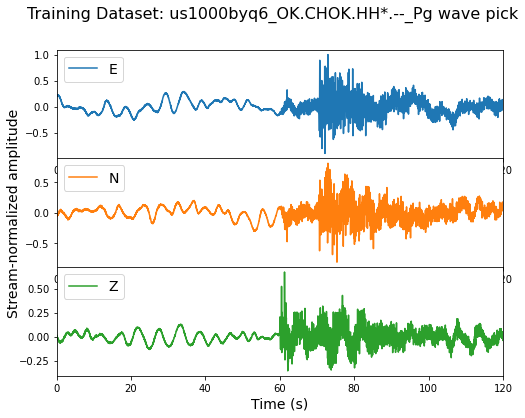

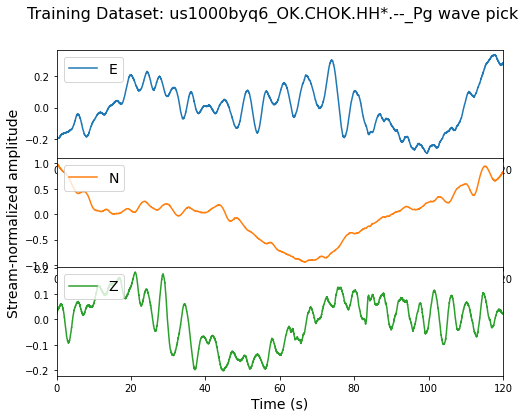

In [6]:
# Lets look at some waveforms
# Wave indices: 0 = waveform, 1 = channel (order ENZ), 2 = sample

#wvf_idx = np.random.choice(np.arange(0,len(valid_labels['phase_id']),1))
wvf_idx = 12
print('Waveform index: ' + str(wvf_idx))
times = np.arange(0,sample_len,1/sr)
print(train_labels['phase_id'][wvf_idx])

# Training

plt.figure(figsize = (8,6))
#plt.suptitle('Training Dataset: ' + str(train_labels['phase_id'][wvf_idx][-2:]) + ' wave pick', fontsize = 16)
plt.suptitle('Training Dataset: ' + str(train_labels['phase_id'][wvf_idx]) + ' wave pick', fontsize = 16)

plt.subplot(311)
plt.plot(times, train_waves[wvf_idx][0].T, color = 'C0', label = 'E') # have to do transpose to plot
plt.legend(loc = 'upper left', fontsize = 14)
plt.xlim(0,sample_len)

plt.subplot(312)
plt.plot(times, train_waves[wvf_idx][1].T, color = 'C1', label = 'N')
plt.legend(loc = 'upper left', fontsize = 14)
plt.ylabel('Stream-normalized amplitude', fontsize = 14)
plt.xlim(0,sample_len)

plt.subplot(313)
plt.plot(times, train_waves[wvf_idx][2].T, color = 'C2', label = 'Z')
plt.legend(loc = 'upper left', fontsize = 14)
plt.xlabel('Time (s)', fontsize = 14)
plt.xlim(0,sample_len)

plt.subplots_adjust(hspace = 0)

# Validation

plt.figure(figsize = (8,6))
#plt.suptitle('Validation Dataset: ' + str(valid_labels['phase_id'][wvf_idx][-2:]) + ' wave pick', fontsize = 16)
plt.suptitle('Training Dataset: ' + str(train_labels['phase_id'][wvf_idx]) + ' wave pick', fontsize = 16)

plt.subplot(311)
plt.plot(times, valid_waves[wvf_idx][0].T, color = 'C0', label = 'E') # have to do transpose to plot
plt.legend(loc = 'upper left', fontsize = 14)
plt.xlim(0,sample_len)

plt.subplot(312)
plt.plot(times, valid_waves[wvf_idx][1].T, color = 'C1', label = 'N')
plt.legend(loc = 'upper left', fontsize = 14)
plt.ylabel('Stream-normalized amplitude', fontsize = 14)
plt.xlim(0,sample_len)

plt.subplot(313)
plt.plot(times, valid_waves[wvf_idx][2].T, color = 'C2', label = 'Z')
plt.legend(loc = 'upper left', fontsize = 14)
plt.xlabel('Time (s)', fontsize = 14)
plt.xlim(0,sample_len)

plt.subplots_adjust(hspace = 0)

# # Testing

# plt.figure(figsize = (8,6))
# plt.suptitle('Testing Dataset: ' + str(test_labels['phase_id'][wvf_idx][-2:]) + ' wave pick', fontsize = 16)

# plt.subplot(311)
# plt.plot(times, test_waves[wvf_idx][0].T, color = 'C0', label = 'E') # have to do transpose to plot
# plt.legend(loc = 'upper left', fontsize = 14)
# plt.xlim(0,119)

# plt.subplot(312)
# plt.plot(times, test_waves[wvf_idx][1].T, color = 'C1', label = 'N')
# plt.legend(loc = 'upper left', fontsize = 14)
# plt.ylabel('Stream-normalized amplitude', fontsize = 14)
# plt.xlim(0,119)

# plt.subplot(313)
# plt.plot(times, test_waves[wvf_idx][2].T, color = 'C2', label = 'Z')
# plt.legend(loc = 'upper left', fontsize = 14)
# plt.xlabel('Time (s)', fontsize = 14)
# plt.xlim(0,119)

# plt.subplots_adjust(hspace = 0);

train_labels['phase_id'][0][-2:] # accessing the phase id for a specific waveform

len(valid_labels['phase_id'])

In [7]:
train_waves_t = train_waves.transpose(0,2,1)
valid_waves_t = valid_waves.transpose(0,2,1)
train_mags = train_labels['source_magnitude']
valid_mags = valid_labels['source_magnitude']

print(train_waves.shape)
print(valid_waves.shape)
print(train_waves_t.shape)
print(valid_waves_t.shape)
print(train_mags.shape)
print(valid_mags.shape)

print(train_mags)
print(valid_mags)

(12000, 3, 4800)
(3000, 3, 4800)
(12000, 4800, 3)
(3000, 4800, 3)
(12000,)
(3000,)
[3.1 3.1 3.1 ... 4.1 4.4 4.4]
[2.3 2.3 2.3 ... 3.8 3.8 2.5]


In [8]:
# How many M7s are even in this dataset?

num7s_train = len(np.where(train_mags >= 7)[0])
print(num7s_train)
num7s_valid = len(np.where(valid_mags >= 7)[0])
print(num7s_valid)

451
104


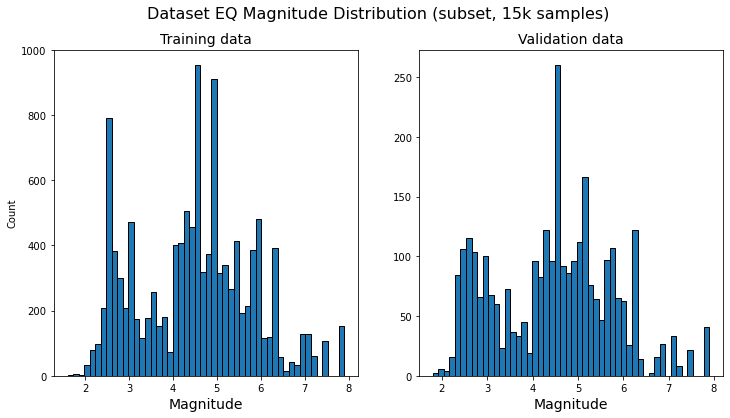

In [9]:
plt.figure(figsize = (12,6))
plt.suptitle('Dataset EQ Magnitude Distribution (subset, 15k samples)', fontsize = 16)

plt.subplot(121)
plt.hist(train_mags, bins = 50, edgecolor='black')
plt.title('Training data', fontsize = 14)
plt.xlabel('Magnitude', fontsize = 14)
plt.ylabel('Count')

plt.subplot(122)
plt.hist(valid_mags, bins = 50, edgecolor='black')
plt.title('Validation data', fontsize = 14)
plt.xlabel('Magnitude', fontsize = 14);

# Load 10s trained model

In [10]:
# MagNet model

epochs_number = 200
batch_size = 256 # originally 256
monte_carlo_sampling = 50
drop_rate = 0.2
filters = [32, 64, 96, 128, 256] 

inp1 = tf.keras.layers.Input(shape=(train_waves_t.shape[1], train_waves_t.shape[2]), name='input_layer') 

e = tf.keras.layers.Conv1D(filters[1], 3, padding = 'same')(inp1) 
e = tf.keras.layers.Dropout(drop_rate)(e, training=True)
e = tf.keras.layers.MaxPooling1D(4, padding='same')(e)
 
e = tf.keras.layers.Conv1D(filters[0], 3, padding = 'same')(e) 
e = tf.keras.layers.Dropout(drop_rate)(e, training=True)
e = tf.keras.layers.MaxPooling1D(4, padding='same')(e)

e = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=False, dropout=0.0, recurrent_dropout=0.0))(e)

e = tf.keras.layers.Dense(2)(e)
o = tf.keras.layers.Activation('linear', name='output_layer')(e)

model = tf.keras.models.Model(inputs=[inp1], outputs=o)

model.summary()

2022-07-01 10:47:48.573115: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-01 10:47:49.887469: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30965 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0
2022-07-01 10:47:49.888664: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 30965 MB memory:  -> device: 1, name: Tesla V100-PCIE-32GB, pci bus id: 0000:d8:00.0, compute capability: 7.0


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 4800, 3)]         0         
                                                                 
 conv1d (Conv1D)             (None, 4800, 64)          640       
                                                                 
 dropout (Dropout)           (None, 4800, 64)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1200, 64)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1200, 32)          6176      
                                                                 
 dropout_1 (Dropout)         (None, 1200, 32)          0         
                                                             

In [11]:
# For calculating the epistemic uncertainty 
class KerasDropoutPrediction(object):
    def __init__(self, model):
        self.model = model
        
    def predict(self, x, n_iter=10):
        predM = []
        auM = []
        
        for itr in range(n_iter):
            print('Prediction: #'+ str(itr+1))
            r = model.predict(x, batch_size=batch_size, verbose=0)
            
            pred = r[:, 0] 
            au = r[:, 1] 
            predM.append(pred.T)
            auM.append(au.T)
        
        predM = np.array(predM).reshape(n_iter,len(predM[0]))
        auM = np.array(auM).reshape(n_iter, len(auM[0])) 
        
        yhat_mean = predM.mean(axis=0)
        yhat_squared_mean = np.square(predM).mean(axis=0)
        
        sigma_squared = 10**(auM) 
        sigma_squared_mean = sigma_squared.mean(axis=0)
        
        ep_unc = predM.std(axis=0)  
        
        combibed = yhat_squared_mean - np.square(yhat_mean)+ sigma_squared_mean
        
        return yhat_mean, sigma_squared_mean, ep_unc, combibed

In [12]:
model.load_weights('/home/sdybing/neic-mlaapde/subset_15k_120s_outputs/subset_15k_120s_054.h5')

In [13]:
kdp = KerasDropoutPrediction(model)
predict, al_unc, ep_unc, comb = kdp.predict(valid_waves_t, monte_carlo_sampling)

Prediction: #1


2022-07-01 10:47:52.406869: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8401
2022-07-01 10:47:53.487892: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


Prediction: #2
Prediction: #3
Prediction: #4
Prediction: #5
Prediction: #6
Prediction: #7
Prediction: #8
Prediction: #9
Prediction: #10
Prediction: #11
Prediction: #12
Prediction: #13
Prediction: #14
Prediction: #15
Prediction: #16
Prediction: #17
Prediction: #18
Prediction: #19
Prediction: #20
Prediction: #21
Prediction: #22
Prediction: #23
Prediction: #24
Prediction: #25
Prediction: #26
Prediction: #27
Prediction: #28
Prediction: #29
Prediction: #30
Prediction: #31
Prediction: #32
Prediction: #33
Prediction: #34
Prediction: #35
Prediction: #36
Prediction: #37
Prediction: #38
Prediction: #39
Prediction: #40
Prediction: #41
Prediction: #42
Prediction: #43
Prediction: #44
Prediction: #45
Prediction: #46
Prediction: #47
Prediction: #48
Prediction: #49
Prediction: #50


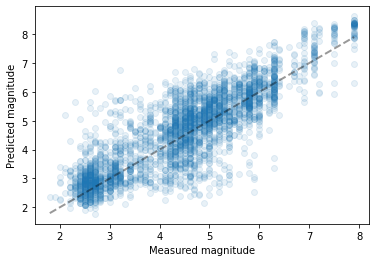

In [14]:
fig4, ax = plt.subplots()
#ax.scatter(valid_mags, predic, alpha = 0.4, facecolors='none', edgecolors='r')
ax.scatter(valid_mags, predict, alpha = 0.1, facecolors='C0')
ax.plot([valid_mags.min(), valid_mags.max()], [valid_mags.min(), valid_mags.max()], 'k--', alpha=0.4, lw=2)
ax.set_xlabel('Measured magnitude')
ax.set_ylabel('Predicted magnitude')
plt.show()
#fig4.savefig(os.path.join(save_dir,'pred_vs_meas_mag.png')) 

In [15]:
print(min(valid_mags))
print(max(valid_mags))

1.8
7.9


In [16]:
bins = np.arange(11,85,1)/10
#print(bins)
print(len(bins))

74


In [17]:
data_bins = []

for abin in bins:
    
    #print(abin)
    i = np.where(valid_mags == abin)[0]
    #print(i)
    
    predict_bin = np.array(predict[i])
    #print(predict_bin)
    
    data_bins.append(predict_bin)
    
#print(data_bins)
print(len(data_bins))

74


In [1]:
#fig = plt.figure(figsize =(14, 14))
fig = plt.figure(figsize =(14, 14), dpi = 300)
fig.suptitle('MLAAPDE subset, 15,000 samples, 120s window', fontsize = 18, y = 0.925)
ax = fig.add_subplot(211)
ax.grid(which = 'major', axis = 'y')
ax.grid(which = 'major', axis = 'x', markevery = [10,20,30,40,50])
ax.set_ylim(1,8.6)
 
bp = ax.boxplot(data_bins, notch = False, patch_artist = True)

for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_edgecolor('blue')

for median in bp['medians']:
    median.set(color ='blue', linewidth = 3)
    
for whisker in bp['whiskers']:
    whisker.set(color ='blue', linewidth = 1)

for cap in bp['caps']:
    cap.set(color ='blue', linewidth = 1)

for flier in bp['fliers']:
    flier.set(marker ='+', color ='blue', alpha = 0.5)

bins_list = bins.tolist()
    
ax.set_xticklabels(bins_list, fontsize = 14)
#ax.set_xlabel('Measured magnitude', fontsize = 14)
ax.set_yticklabels([1, 2, 3, 4, 5, 6, 7, 8], fontsize = 14)
ax.set_ylabel('Predicted magnitude', fontsize = 16)

ax.xaxis.set_major_locator(plt.MaxNLocator(8))

ax.plot((1.1,70),(1.1,8),'r--', linewidth = 3, alpha = 0.5)
ax.text(s = 'Testing results', x = 2, y = 8, fontsize = 18, backgroundcolor = 'lightskyblue')


ax2 = fig.add_subplot(212)
#ax2.set_title('Testing data magnitude histogram', fontsize = 16)
ax2.grid(which = 'major', axis = 'x')
ax2.hist(train_mags, bins = 70, range = (1.1,8.5), edgecolor = 'black')
ax2.set_xlim(1.05,8.45)
ax2.set_ylabel('Counts', fontsize = 16)
ax2.set_xlabel('Measured magnitude', fontsize = 16)
ax2.tick_params(axis = 'both', labelsize = 14)
ax2.text(s = 'Training data magnitude histogram', x = 1.2, y = 680, fontsize = 18, backgroundcolor = 'lightskyblue')

plt.subplots_adjust(hspace = 0);

plt.savefig('/home/sdybing/neic-mlaapde/subset_15k_120s_outputs/boxplot_histogram.png', format = 'PNG', facecolor = 'white', transparent = False);

NameError: name 'plt' is not defined